# Worksheet 12

Name:  Renming Zhang\
UID: U97677301

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes
2. No
3. No
4. No

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Train-test split.
1. Data Splitting: Divide your dataset into two parts randomly, maintaining the underlying distribution of the data. Typically, this involves assigning a certain percentage of the data to the training set and the remaining to the testing set. The commonly used splits are 70/30, 80/20, or 90/10, depending on the size of your dataset.

2. Training Set: Use the training set to train your model. This involves fitting the model to the data and adjusting the model parameters based on the training data.

3. Testing Set: Use the testing set to evaluate the performance of your trained model. This helps to understand how well the model is likely to perform on unseen data. After training, you would apply the model to the testing data and measure the model's performance metrics, such as accuracy, precision, recall, F1 score, or any other relevant metrics based on the nature of the problem.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

- Underfitting:
Underfitting occurs when a model is too simple to capture the underlying pattern of the data. It often happens when the model is not complex enough to learn from the dataset, resulting in high bias. In such cases, the model tends to oversimplify the relationships between the features and the target variable, leading to poor performance on both the training and testing data.

- Signs of Underfitting:

1. Poor performance on the training data (low accuracy, high error).
2. Poor performance on the testing data, similar to the training data.
3. Inability to capture the underlying patterns or relationships in the data.

- Overfitting:
Overfitting occurs when a model learns the training data too well, including the noise or random fluctuations, and fails to generalize to new, unseen data. It often happens when the model is overly complex, having too many parameters or features relative to the number of training examples. This leads to high variance in the model, causing it to fit the training data too closely.

- Signs of Overfitting:

1. Very high accuracy on the training data.
2. Poor performance on the testing data compared to the training data.
3. Excessive fluctuation in the model when the training data is slightly varied.

### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

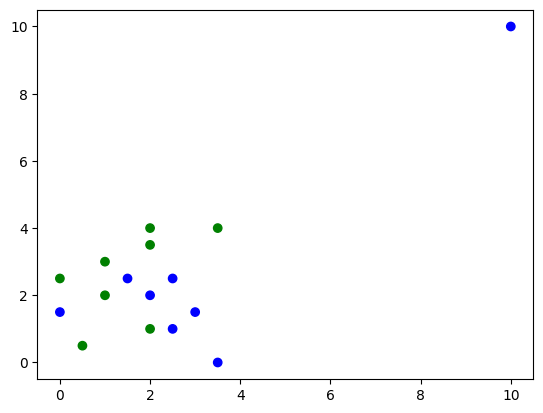

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes, it appears that the data point with "Attribute A" as 10 and "Attribute B" as 10 could be considered an outlier as it is significantly distant from the other data points. We can remove this point from the dataset before plotting. Here's the updated code:

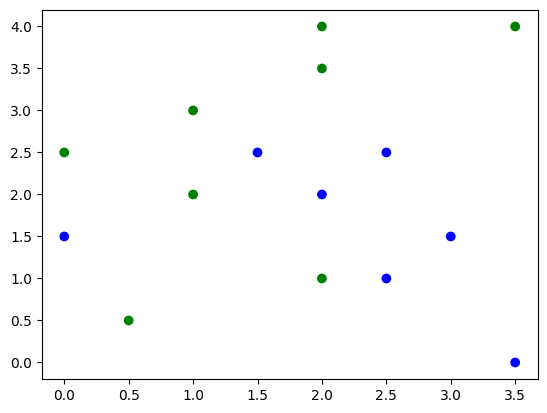

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.0],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Looking at the dataset, there are no obvious noise points, as each point seems to follow a general trend and doesn't significantly deviate from the overall pattern. 

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

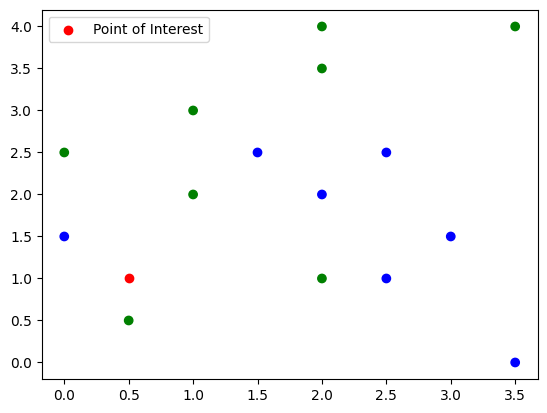

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A": [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.0],
    "Attribute B": [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.scatter(0.5, 1, color='r', label='Point of Interest')
plt.legend()
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

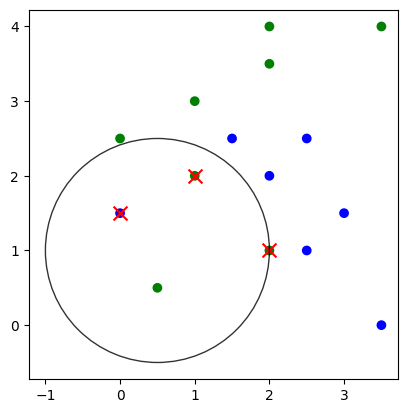

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A": [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.0],
    "Attribute B": [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

def n_closest_to(example, n, data):
    distances = [np.linalg.norm(np.array(example) - np.array(point)) for point in zip(data["Attribute A"], data["Attribute B"])]
    sorted_indices = np.argsort(distances)
    closest_points = [(data["Attribute A"][i], data["Attribute B"][i]) for i in sorted_indices[1:n+1]]
    farthest_distance = distances[sorted_indices[n]]
    return closest_points, farthest_distance

location = (0.5, 1)
radius = n_closest_to(location, 3, data)[1]
closest_points, _ = n_closest_to(location, 3, data)

_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
for point in closest_points:
    axes.scatter(point[0], point[1], color='r', marker='x', s=100)
cir = plt.Circle(location, radius, fill=False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal')  # necessary so that the circle is not oval
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [6]:
def majority_class(points, data):
    class_counts = {0: 0, 1: 0}  # Initializing class counts
    for point in points:
        index = data["Attribute A"].index(point[0])  # Finding the index of the point in the dataset
        if data["Attribute B"][index] == point[1]:
            class_counts[data["Class"][index]] += 1  # Incrementing the count for the corresponding class
    majority_class = max(class_counts, key=class_counts.get)  # Finding the majority class
    return majority_class

closest_points, _ = n_closest_to(location, 3, data)
assigned_class = majority_class(closest_points, data)
print(f"The majority class assigned to the new point is: {assigned_class}")


The majority class assigned to the new point is: 0


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [7]:
count = 0
for i in range(len(data["Attribute A"])):
    actual_class = data["Class"][i]
    training_data = {"Attribute A": [], "Attribute B": [], "Class": []}
    for j in range(len(data["Attribute A"])):
        if j != i:
            training_data["Attribute A"].append(data["Attribute A"][j])
            training_data["Attribute B"].append(data["Attribute B"][j])
            training_data["Class"].append(data["Class"][j])
    closest_points, _ = n_closest_to((data["Attribute A"][i], data["Attribute B"][i]), 3, training_data)
    assigned_class = majority_class(closest_points, training_data)
    if assigned_class == actual_class:
        count += 1

print(f"overall accuracy = {count / len(data['Attribute A'])}")


overall accuracy = 0.4
